In [1]:
from pandas import read_csv
import numpy 
from pandas import datetime
from matplotlib import pyplot
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection
from sklearn import svm
from sklearn.svm import SVR
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn import metrics
import random
import pylab as pl
import csv

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
series = read_csv('output2nd.csv')
X = series.values
print(series.columns)
print(series)
print(series.describe())

Index(['Month', 'Fuel Oil Consumption(Predicted)',
       'Cooling Degree Days U.S. Average', 'Heating Degree Days U.S. Average ',
       'Fuel Oil Consumption(Actual)'],
      dtype='object')
     Month  Fuel Oil Consumption(Predicted)  Cooling Degree Days U.S. Average  \
0        1                         0.894624                                 7   
1        2                         1.049869                                 8   
2        3                         0.640267                                29   
3        4                         0.428591                                29   
4        5                         0.396877                               135   
5        6                         0.297866                               202   
6        7                         0.400244                               294   
7        8                         0.373951                               248   
8        9                         0.449943                               171 

In [ ]:
series.shape

In [ ]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(series,x_vars=['Fuel Oil Consumption(Predicted)','Cooling Degree Days U.S. Average','Heating Degree Days U.S. Average '], y_vars='Fuel Oil Consumption(Actual)', size=7, aspect=0.7)

In [ ]:
y= series['Fuel Oil Consumption(Actual)']
#X= series.drop('Fuel Oil Consumption(Actual)',axis = 1)
X= series['Fuel Oil Consumption(Predicted)']

In [ ]:
n_train=168
X_train, X_test = X[:n_train],X[n_train:]
print(X_train)
print(X_test)
    
y_train, y_test = y[:n_train],y[n_train:]
print(y_train)
print(y_test)

In [ ]:
# TODO: Shuffle and split the data into training and testing subsets
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=10)

In [ ]:
X_train

In [ ]:
len(X_train)

In [ ]:
X_test

In [ ]:
len(X_test)

In [ ]:
svr = svm.SVR(kernel="rbf", gamma=0.1)
#svr=svm.SVR(kernel='linear')
svr.fit(X_train.values.reshape(-1,1),y_train)

In [ ]:
svr.score(X_test.values.reshape(-1,1),y_test)

In [ ]:
predSVR = svr.predict(X_test.values.reshape(-1,1))

In [ ]:
predSVR

In [ ]:
y_test

In [ ]:
expected=y_test

In [ ]:
expected

In [ ]:
mean_squared_error(expected,predSVR)

In [ ]:
pyplot.scatter(expected, predSVR,c='red')
pyplot.xlabel('expected')
pyplot.ylabel('predictions')

In [ ]:
pyplot.plot(y_test, y_test, label='Actual')
pyplot.plot(X_test, y_test, label='Predicted')
#pyplot.plot(X, y, label='Features')
pyplot.plot(X_test, predSVR, 'co', label='SVR')
pyplot.legend()
pyplot.show()

In [ ]:
X=series['Fuel Oil Consumption(Predicted)'].values
y=series['Fuel Oil Consumption(Actual)'].values
svr_rbf=SVR(kernel='rbf', C=1e3, gamma=0.1)
#y_rbf=svr_rbf.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1).ravel()).predict(X_train.reshape(-1,1))
#lw=2
#pyplot.scatter(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1).ravel(),color='darkorange',label='data')
#pyplot.plot(X_train.values.reshape(-1,1),y_rbf,color='navy',lw=lw,label='RBF model')
y_rbf=svr_rbf.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1).ravel()).predict(X_test.reshape(-1,1))
print(y_rbf)
lw=2
pyplot.scatter(X_test.values.reshape(-1,1),y_test.values.reshape(-1,1).ravel(),color='darkorange',label='data')
pyplot.plot(X_test.values.reshape(-1,1),y_rbf,color='navy',lw=lw,label='RBF model')
pyplot.xlabel('Fuel Oil Consumption(Predicted)')
pyplot.ylabel('Fuel Oil Consumption(Actual)')
pyplot.title('Support Vector Regression')
pyplot.legend()
pyplot.show()

In [ ]:
X=series['Cooling Degree Days U.S. Average'].values
y=series['Fuel Oil Consumption(Actual)'].values
svr_rbf=SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf=svr_rbf.fit(X.reshape(-1,1),y.reshape(-1,1).ravel()).predict(X.reshape(-1,1))
lw=2
pyplot.scatter(X.reshape(-1,1),y.reshape(-1,1).ravel(),color='darkorange',label='data')
pyplot.plot(X.reshape(-1,1),y_rbf,color='navy',lw=lw,label='RBF model')
pyplot.xlabel('Cooling Degree Days U.S. Average')
pyplot.ylabel('Fuel Oil Consumption(Actual)')
pyplot.title('Support Vector Regression')
pyplot.legend()
pyplot.show()

[ 0.97  0.84  0.63  0.49  0.35  0.34  0.32  0.36  0.39  0.46  0.55  0.73
  0.79  0.75  0.65  0.42  0.38  0.35  0.3   0.37  0.38  0.41  0.54  0.73
  0.7   0.75  0.65  0.39  0.32  0.28  0.26  0.3   0.3   0.37  0.44  0.49
  0.74  0.92  0.66  0.47  0.32  0.25  0.22  0.24  0.23  0.29  0.46  0.63
  0.75  0.73  0.55  0.35  0.23  0.2   0.19  0.21  0.25  0.36  0.45  0.7
  0.85  0.7   0.54  0.33  0.2   0.17  0.15  0.14  0.21  0.31  0.34  0.61
  0.74  0.71  0.4   0.21  0.16  0.14  0.11  0.13  0.17  0.26  0.38  0.68
  0.76  0.68  0.46  0.26  0.13  0.11  0.1   0.12  0.18  0.25  0.39  0.49
  0.61  0.51  0.32  0.19  0.14  0.1   0.09  0.11  0.13  0.22  0.39  0.48
  0.66  0.61  0.44  0.27  0.14  0.1   0.1   0.11  0.15  0.24  0.39  0.58
  0.74  0.67  0.51  0.25  0.13  0.1   0.11  0.12  0.19  0.26  0.44  0.57
  0.71  0.83  0.49  0.27  0.15  0.1   0.1   0.12  0.18  0.29  0.35  0.45
  0.63  0.62  0.38  0.26  0.16  0.1   0.08  0.11  0.15  0.25  0.35  0.59
  0.61  0.52  0.47  0.23  0.16  0.12  0.1   0.12  0.

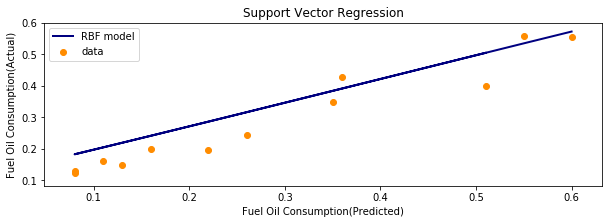

0.0035498142821913958

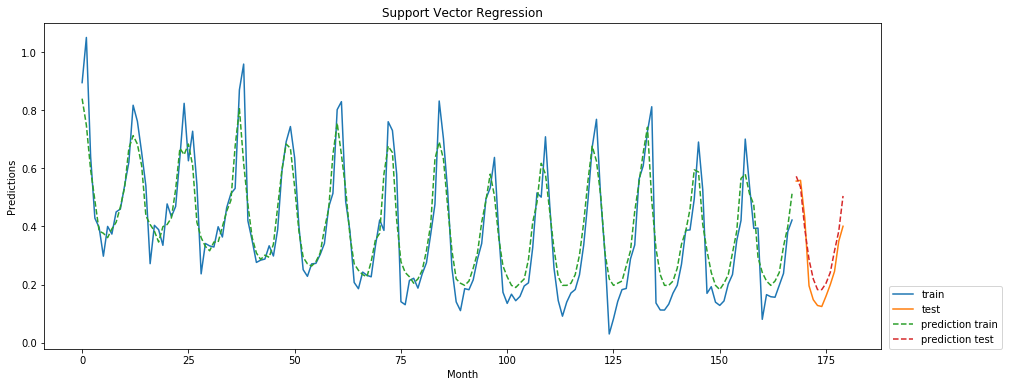

In [7]:
n_train = 168
features=series['Fuel Oil Consumption(Actual)'].values
target=series['Fuel Oil Consumption(Predicted)'].values
X=target

X_train, X_test = features[:n_train], features[n_train:]
print(X_train)
print(X_test)
    
y_train, y_test = target[:n_train], target[n_train:]
print(y_train)
print(y_test)
svr = svm.SVR(kernel="rbf", gamma=0.1)
svr.fit(X_train.reshape(-1,1),y_train)
y_pred = svr.predict(X_test.reshape(-1,1))
print(y_pred)
y_pred_train = svr.predict(X_train.reshape(-1,1))
pyplot.figure(figsize=(10, 3))
#pyplot.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,ha="left")
pyplot.plot(range(n_train), y_train, label="train")
pyplot.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
pyplot.plot(range(n_train), y_pred_train, '--', label="prediction train")
pyplot.plot(range(n_train, len(y_test) + n_train), y_pred, '--',label="prediction test")
pyplot.legend(loc=(1.01, 0))
pyplot.xlabel("Month")
pyplot.ylabel("Predictions")
pyplot.title("Support Vector Regression")
mean_squared_error(y_test,y_pred)